Linear Regression R²: 0.9183
Polynomial Regression R²: 0.9272


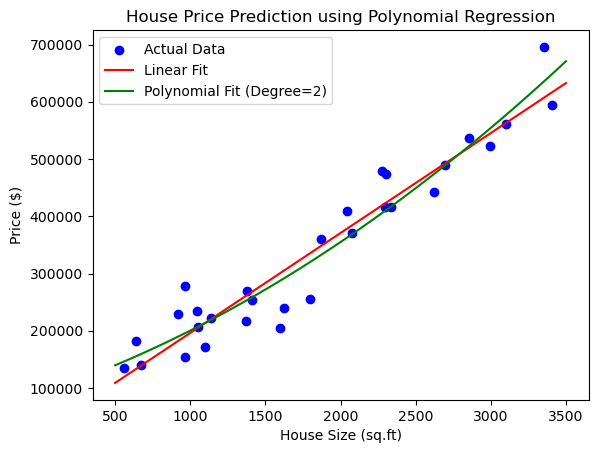

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

#Step 1: Create synthetic data

np.random.seed(42)

# house size (sq.ft)
X = np.random.uniform(500, 3500, 30).reshape(-1, 1)
# price
y = 50000 + 120 * X + 0.02 * (X ** 2) + np.random.normal(0, 50000, size=X.shape)

#Step 2: Train Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

#Step 3: Train Polynomial Regression (degree=2)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

#Step 4: Predictions

X_test = np.linspace(500, 3500, 100).reshape(-1, 1)
y_lin_pred = lin_reg.predict(X_test)
y_poly_pred = poly_reg.predict(poly.transform(X_test))

#Step 5: R² Scores
r2_lin = r2_score(y, lin_reg.predict(X))
r2_poly = r2_score(y, poly_reg.predict(X_poly))


print("Linear Regression R²:", round(r2_lin, 4))
print("Polynomial Regression R²:", round(r2_poly, 4))

#Step 6: Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_lin_pred, color='red', label='Linear Fit')
plt.plot(X_test, y_poly_pred, color='green', label='Polynomial Fit (Degree=2)')
plt.title("House Price Prediction using Polynomial Regression")
plt.xlabel("House Size (sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()